# Explore here

In [127]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.model_selection import GridSearchCV
import joblib

In [129]:
# Cargamos lsos datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df =pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
# Comprobamos tamaño del dataframe
df.shape

(768, 9)

In [131]:
#Comprobamos tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
# Comprobamos duplicados
df.duplicated().sum()

np.int64(0)

In [133]:
# Comprobamos valores nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [134]:
# Comprobamos valores únicos
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [135]:
# Detectamos valores incompatibles con la vida
# En este dataset, variables como Glucose, BloodPressure, SkinThickness, Insulin y BMI no pueden ser 0
var_incomp = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for var in var_incomp:
    incompatible_count = (df[var] == 0).sum()
    if incompatible_count > 0:
        print(f"{var} tiene {incompatible_count} valores de 0, lo cual es incompatible con la vida.")

Glucose tiene 5 valores de 0, lo cual es incompatible con la vida.
BloodPressure tiene 35 valores de 0, lo cual es incompatible con la vida.
SkinThickness tiene 227 valores de 0, lo cual es incompatible con la vida.
Insulin tiene 374 valores de 0, lo cual es incompatible con la vida.
BMI tiene 11 valores de 0, lo cual es incompatible con la vida.


In [136]:
# Reemplazamos de valores 0 con NaN para su imputación
for var in var_incomp:
    df[var] = df[var].replace(0, np.nan)

# Verificamos cuántos NaN tenemos ahora
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [137]:
# Imputamos valores faltantes con la media de cada columna
for var in var_incomp:
    mean_value = df[var].mean()
    df[var].fillna(mean_value, inplace=True)

/tmp/ipykernel_5637/3754483980.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(mean_value, inplace=True)


In [138]:
# ELiminamos la variable insulina al tener un alto número de valores nulos
df.drop('Insulin', axis = 1, inplace= True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,43.1,2.288,33,1


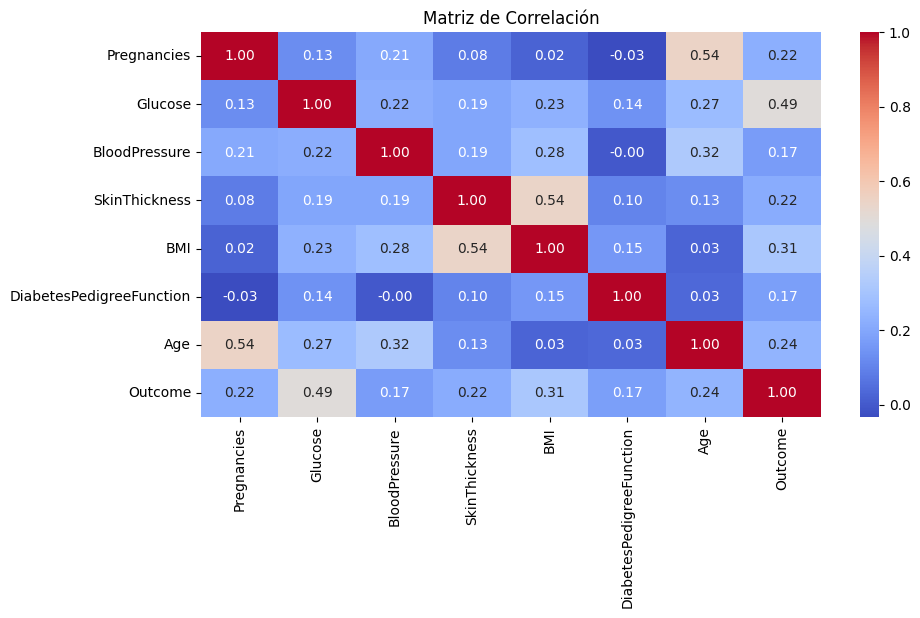

In [139]:
# Matriz de Correlación
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

De la gráfica anterior observamos lo siguiente:
- La edad está muy relacionada con el número de embarazos (pregnancies)
- La glucosa está muy relacionada con el resultado
- La Insulina está muy relacionada con el grosor de la piel (skinthickness)

In [140]:
# Partición de los datos
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Selección de características importantes con XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

importancias = xgb_model.feature_importances_
importancias_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importancias})
importancias_df = importancias_df[importancias_df["Importance"] > 0.01]  # Mayor al 1%

print("Características seleccionadas:")
print(importancias_df)

Características seleccionadas:
                    Feature  Importance
0               Pregnancies    0.099930
1                   Glucose    0.274041
2             BloodPressure    0.100201
3             SkinThickness    0.123349
4                       BMI    0.158008
5  DiabetesPedigreeFunction    0.099855
6                       Age    0.144615


In [142]:
# Creamos un arbol de decisión simple y otro complejo
arbol_simple = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=100, random_state=42).fit(X_train, y_train)
arbol_complejo = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=42).fit(X_train, y_train)

# Aplicamos los arboles  en los datos de train y test
train_pred_complejo = arbol_complejo.predict(X_train)
test_pred_complejo = arbol_complejo.predict(X_test)
train_pred_simple = arbol_simple.predict(X_train)
test_pred_simple = arbol_simple.predict(X_test)

In [143]:
# Definimos las métricas para entrenaminto
def metricas(y_train, y_test, y_pred_train, y_pred_test):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

#Métricas para prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

# Diferencia entre métricas
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

# Creamos un dataframe con los resultados obtenidos
    df_metricas = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return df_metricas

In [144]:
# Visualizamos los resultados con el arbol de decisión simple
metricas(y_train, y_test,train_pred_simple,test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.732899,0.477707,0.643637,0.742574,0.352113,0.935162
Test,0.740260,0.545455,0.672727,0.727273,0.436364,0.909091
Diferencia,-0.007361,-0.067748,-0.029090,0.015302,-0.084251,0.026071


De la grafica anterior detectamos lo siguiente:
- Accuracy es practicamente la misma en entrenameinto que en test, lo que nos lleva a pensar que no hay sobreajuste
- La exactitud del modelo(F1) también es mejor en test que en entrenamiento
- La prevalencia(AUC) es mayor en entrenamiento que en test
- La especificidad alta nos indica que que el modelo detecta bien los  no diableticos, y que es ligeramente mejor en los datos de test.
- El recall es similar en ambos casos, siendo algo bajo (43% en test)

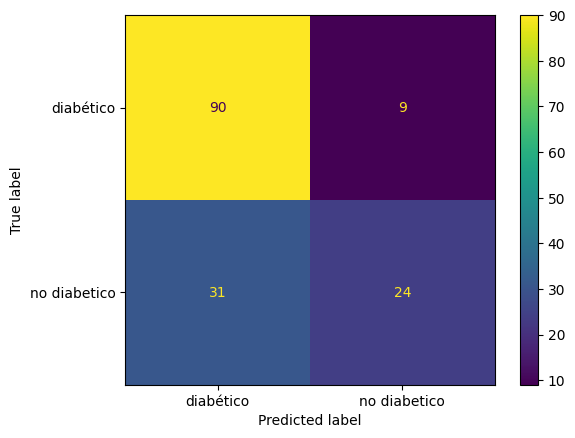

In [145]:
# Matriz de confusión para comprobar nuestras sospechas

Matriz_conf= confusion_matrix(y_test, test_pred_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz_conf, display_labels=['diabético', 'no diabetico'])
disp.plot()

In [146]:
# Visualizamos los resultados con el arbol de decisión complejo
metricas(y_train, y_test,train_pred_complejo,test_pred_complejo)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.778502,0.654822,0.737979,0.712707,0.605634,0.870324
Test,0.727273,0.603774,0.694949,0.627451,0.581818,0.808081
Diferencia,0.051229,0.051049,0.043030,0.085256,0.023816,0.062243


De la grafica anterior detectamos lo siguiente:
- Accuracy presenta una diferencia baja, lo que nos lleva a pensar que no hay sobreajuste
- La exactitud del modelo(F1) también es muy similar entre entrenamiento y test
- La diferencia en la prevalencia(AUC) es baja, por lo que sospechamos que el modelo no está aprendiendo de los datos de entrenamiento
- La especificidad alta nos indica que que el modelo detecta bien los no diableticos(80% en test)
- El recall es similar en ambos casos, siendo algo bajo (58% en test)

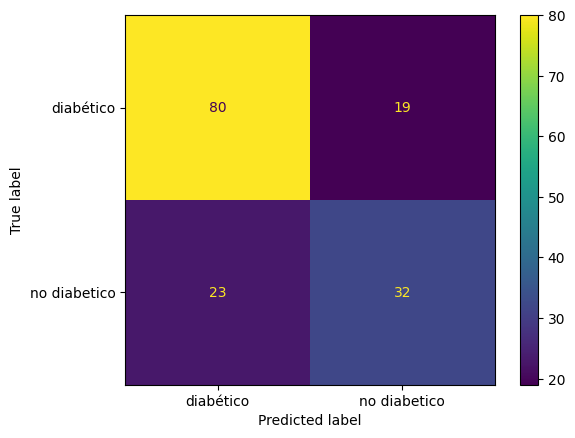

In [147]:
Matriz_conf= confusion_matrix(y_test, test_pred_complejo)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz_conf, display_labels=['diabético', 'no diabetico'])
disp.plot()

Para mejorar la detección de la diabetes decidimos optimizar el árbol complejo, ya que presenta un recall mayor que el árbol simple, a pesar de que la especificidad sea más alta en el arbol simple, en el complejo tambien se puede considerar que es alta (80%)

In [148]:
# Optimización del modelo Complejo

parametros = {
    "max_depth": [1, 10, 15, 20],
    "min_samples_split": [25, 50, 75,100],
    "min_samples_leaf": [5,10,15,20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parametros, cv=5, scoring="recall")
grid_search.fit(X_train, y_train)

print(f"Mejor configuración encontrada: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
recall_best = recall_score(y_test, y_pred_best)

print(f"Recall del mejor modelo optimizado: {recall_best:.4f}")

Mejor configuración encontrada: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 75}
Recall del mejor modelo optimizado: 0.6364


Con la optimizació del modelo hemos conseguido mejorar el recall de un 58% a un 69%

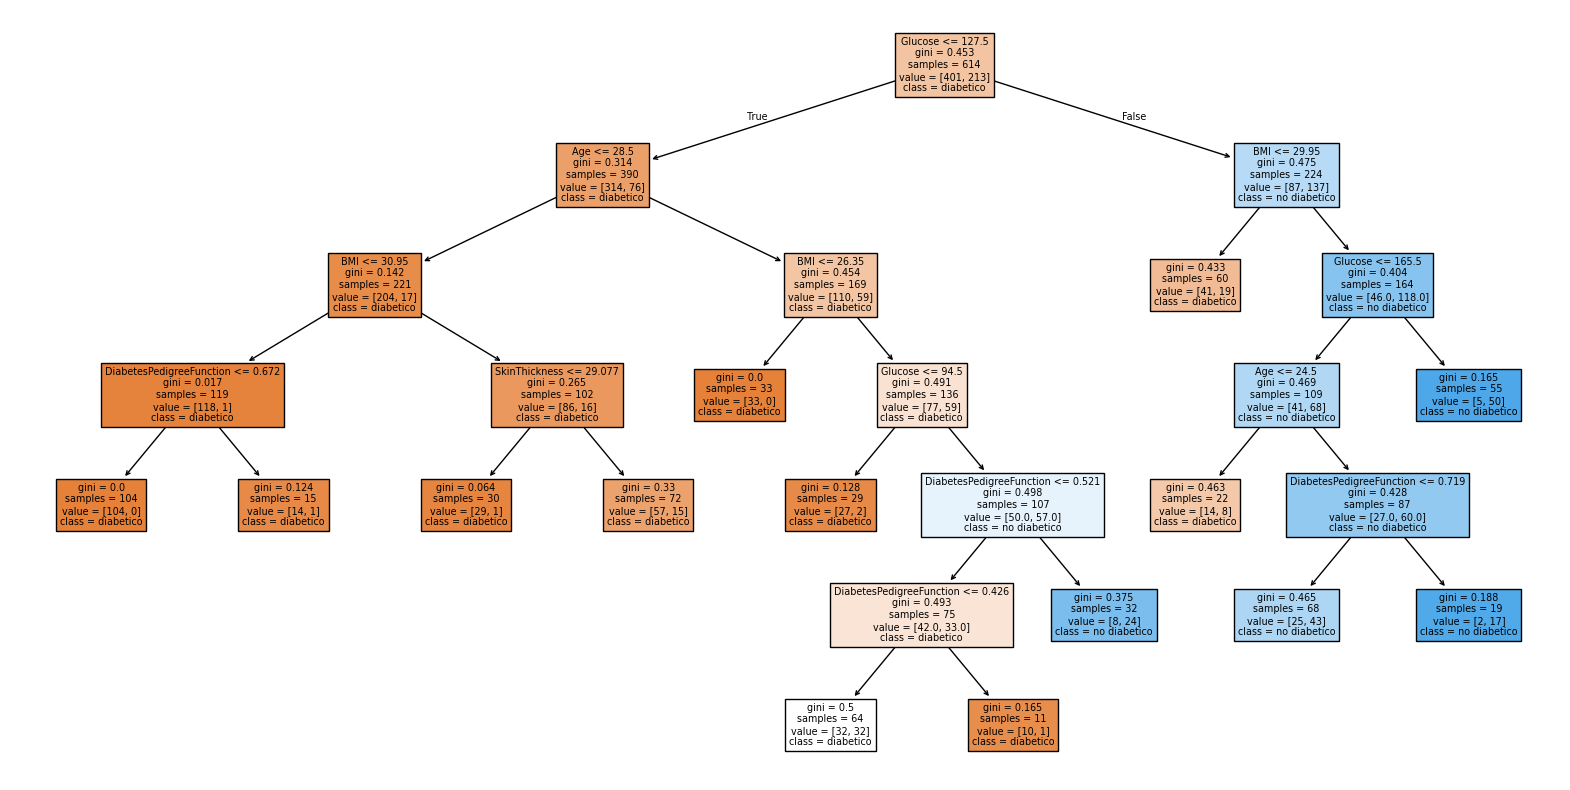

In [149]:
# Graficamos árbol de decisión complejo
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['diabetico','no diabetico'], filled=True)
plt.show()

In [150]:
# Guardamos del modelo
joblib.dump(best_model, "modelo_diabetes.pkl")

['modelo_diabetes.pkl']